# 1. Exploration du Dataset MNIST

## Objectif
Dans ce notebook, nous allons :
1. Charger et examiner le dataset MNIST
2. Comprendre la structure des données
3. Visualiser quelques exemples
4. Préparer les données pour l'entraînement

## Pourquoi cette étape est cruciale ?
Avant de construire un réseau de neurones, il faut comprendre parfaitement les données

## 1. Importation des librairies

Nous devons importer toutes les librairies nécessaires pour notre exploration :  

- NumPy pour les calculs
- Matplotlib pour les visualisations
- Scikit-learn pour charger facilement le dataset MNIST.
- Pandas pour manipuler des tableaux de données (DataFrames)

In [ ]:
# Librairies :
import numpy as np # Manipulation de données
import matplotlib.pyplot as plt # Visualisation
from sklearn.datasets import fetch_openml # fetch_openml télécharge automatiquement le dataset depuis OpenML.org = site web qui héberge des milliers de datasets publics. Le dataset MNIST y est stocké avec l'identifiant 'mnist_784'
import pandas as pd # Manipulation de données tabulaires

# Configuration pour de belles visualisations
plt.style.use('default') # Utilisation du style par défaut de Matplotlib
plt.rcParams['figure.figsize'] = (12, 8) # Définition de la taille des figures
'''
Sans ces 2 lignes de code, tes graphiques seraient plus petits et moins lisibles.
Avec ça, ils seront grands et beaux dès le départ !
'''

print(" Librairies importées avec succès ! ")

 Librairies importées avec succès ! 


## 2. Chargement du dataset MNIST

Maintenant nous allons charger le fameux dataset MNIST. Scikit-learn nous permet de le télécharger directement depuis internet.  

Cette étape peut prendre quelques secondes car le dataset fait environ 70 MB.

In [ ]:
print("Chargement du dataset MNIST en cours...") # Affichage de chargement en cours

mnist = fetch_openml('mnist_784', version=1, as_frame=False) # fetch_openml télécharge automatiquement le dataset depuis OpenML.org = site web qui héberge des milliers de datasets publics. Le dataset MNIST y est stocké avec l'identifiant 'mnist_784'
X, y = mnist.data, mnist.target.astype(int) # X contient les images (28x28 pixels = 784 pixels par image) et y contient les labels (chiffres de 0 à 9)

#Affichage des informations :
print("Dataset chargé avec succès ") # Affichage si le chargement s'est bien passé
print(f"Forme des données X: {X.shape} ") # 70,000 images avec 784 pixels chacune
print(f"Forme des labels y: {y.shape} ") # 70,000 labels (chiffres de 0 à 9)
print(f"Type des données X: {type(X)} ") # l'objet X est un tableau NumPy
print(f"Type des labels y: {type(y)} ") # l'objet y est un tableau NumPy
'''
Pourquoi c'est important ?
Shape = comprendre la structure des données
Type = s'assurer qu'on a le bon format pour nos calculs
'''

Chargement du dataset MNIST en cours...
Dataset chargé avec succès 
Forme des données X: (70000, 784) 
Forme des labels y: (70000,) 
Type des données X: <class 'numpy.ndarray'> 
Type des labels y: <class 'numpy.ndarray'> 


"\nPourquoi c'est important ?\nShape = comprendre la structure des données\nType = s'assurer qu'on a le bon format pour nos calculs\n"

## 3. Visualisation de quelques exemples

Maintenant que nous comprenons la structure des données, visualisons quelques chiffres pour voir à quoi ressemblent nos données d'entraînement.  

Cela nous aidera à comprendre ce que notre réseau de neurones devra apprendre à reconnaître.

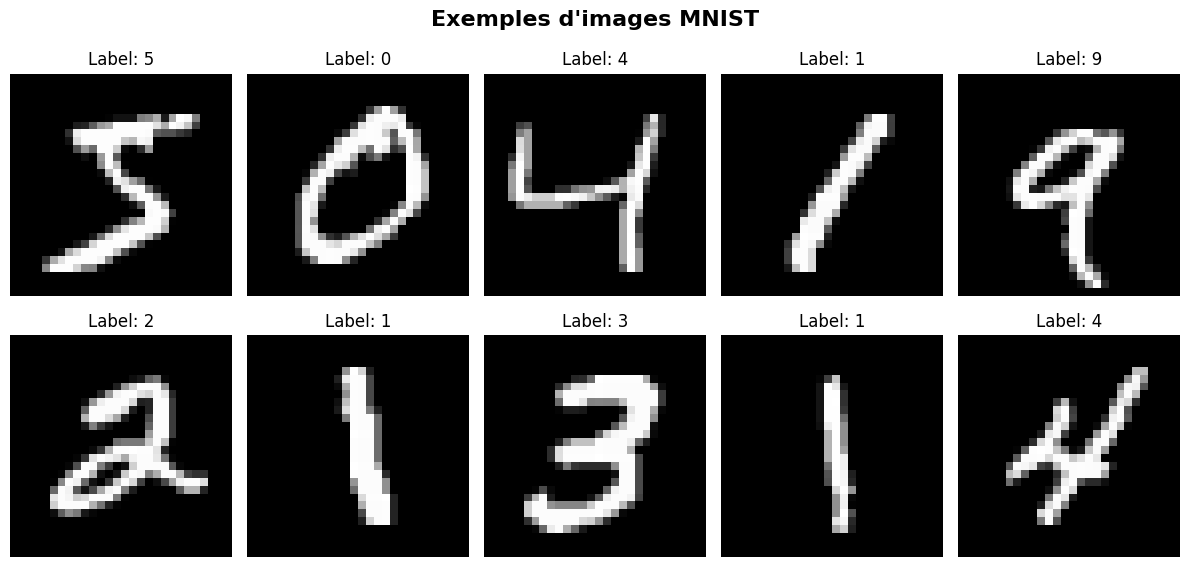

In [36]:
figure, axes = plt.subplots(2, 5, figsize=(12, 6)) # crée une figure avec 2 lignes et 5 colonnes pour afficher 10 images, avec une taille de 12x6 pouces

figure.suptitle('Exemples d\'images MNIST', fontsize=16, fontweight='bold') # ajoute un titre général en haut de la figure

for i in range(10):  # boucle sur les 10 premières images
    row = i // 5     # calcule la ligne (0 ou 1) où placer l'image
    col = i % 5      # calcule la colonne (0 à 4) où placer l'image
    
    image = X[i].reshape(28, 28) # transforme le vecteur de 784 pixels en matrice 28x28
    
    axes[row, col].imshow(image, cmap='gray') # affiche l'image en niveaux de gris dans la bonne case
    axes[row, col].set_title(f'Label: {y[i]}', fontsize=12) # affiche le label (le chiffre) au-dessus de l'image
    axes[row, col].axis('off')  # enlève les axes pour un affichage plus propre

plt.tight_layout() # ajuste l'espacement pour éviter que les images ou titres ne se chevauchent
plt.show()         # affiche la figure d'images à l'écran

## 4. Distribution des classes

Il est important de vérifier si notre dataset est équilibré, c'est-à-dire si chaque chiffre (0-9) apparaît à peu près le même nombre de fois.  
Un dataset déséquilibré pourrait biaiser notre modèle.

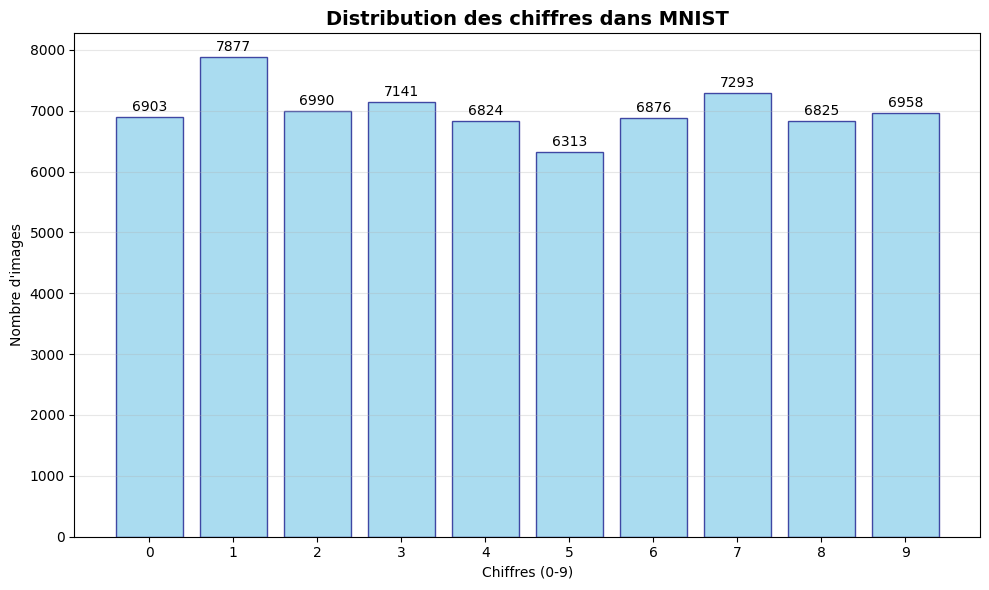

Chaque chiffre apparaît environ 7000 fois


In [37]:
unique, counts = np.unique(y, return_counts=True) # Calcule tous les chiffres uniques présents dans y (les labels) et compte combien de fois chaque chiffre apparaît.

# Créer un graphique en barres
plt.figure(figsize=(10, 6)) # Crée une nouvelle figure de taille 10x6 pouces
bars = plt.bar(unique, counts, color='skyblue', edgecolor='navy', alpha=0.7) # Affiche les barres pour chaque chiffre, couleur bleu clair, contour bleu foncé

plt.title('Distribution des chiffres dans MNIST', fontsize=14, fontweight='bold') # Ajoute un titre au graphique
plt.xlabel('Chiffres (0-9)') # Ajoute un label à l’axe X
plt.ylabel('Nombre d\'images') # Ajoute un label à l’axe Y
plt.grid(axis='y', alpha=0.3) # Ajoute une grille horizontale légère

# Ajouter les valeurs sur les barres
for bar, count in zip(bars, counts): # Pour chaque barre et son nombre associé
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,  # Place le texte au-dessus de la barre, centré
             str(count), ha='center', va='bottom') # Affiche le nombre d’images

# Forcer l'affichage de tous les chiffres sur l'axe X
plt.xticks(unique, [str(digit) for digit in unique]) # Affiche tous les chiffres (0 à 9) sous les barres

plt.tight_layout() # Ajuste l’espacement pour éviter les chevauchements
plt.show() # Affiche le graphique

print(f"Chaque chiffre apparaît environ {counts.mean():.0f} fois") # Affiche le nombre moyen d’images par chiffre

## 5. Prétraitement des données (normalisation)

Avant d’entraîner un réseau de neurones, il est important de normaliser les données. Les pixels de MNIST vont de 0 à 255. On va les ramener entre 0 et 1 pour faciliter l’apprentissage du modèle.

**Qu’est-ce que la normalisation ?**   

La normalisation, c’est comme mettre toutes tes données à la même échelle.  
Imagine que tu compares la taille de personnes : certains mesurent en centimètres, d’autres en mètres, d’autres en pouces…. 
Pour comparer tout le monde facilement, tu veux que tout soit dans la même unité, par exemple entre 0 et 1.  

**Pourquoi normaliser les images MNIST ?** 

- Les pixels d’une image MNIST sont des nombres entre 0 (noir) et 255 (blanc).  
- Si tu donnes ces valeurs brutes à un réseau de neurones, il va avoir du mal à apprendre :  
    - Les calculs seront plus difficiles (grands chiffres = grands écarts). 
    - Certains paramètres risquent de dominer les autres (effet d’échelle). 
- Normaliser = ramener chaque pixel entre 0 et 1, donc :  
    - 0 reste 0 (noir). 
    - 255 devient 1 (blanc). 
    - 127 devient environ 0.5 (gris moyen). 

**Comment on fait ?** 

On divise chaque valeur de pixel par 255 :  

- 0 / 255 = 0.0. 
- 127 / 255 ≈ 0.5. 
- 255 / 255 = 1.0. 

In [38]:
X_norm = X / 255.0  # Normalisation des données : on divise chaque pixel par 255 pour obtenir des valeurs entre 0 et 1

print(f"Valeurs minimales après normalisation : {X_norm.min()}")  # Affiche la plus petite valeur du tableau normalisé (doit être 0.0)
print(f"Valeurs maximales après normalisation : {X_norm.max()}")  # Affiche la plus grande valeur du tableau normalisé (doit être 1.0)

Valeurs minimales après normalisation : 0.0
Valeurs maximales après normalisation : 1.0


## 6. Séparation des données en train et test

Pour évaluer la performance de notre futur modèle, on doit séparer nos données en deux parties :  

- Entraînement (train) : pour apprendre. 
- Test : pour vérifier si le modèle a bien appris sur des données jamais vues.  

On va utiliser une fonction de scikit-learn pour faire cette séparation de façon aléatoire.  

In [39]:
from sklearn.model_selection import train_test_split # Importe la fonction pour séparer les données

# Sépare les données en 80% pour l'entraînement et 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42) # 20% test, 80% train, random_state pour reproductibilité

print(f"X_train : {X_train.shape} | y_train : {y_train.shape}") # Affiche la taille du jeu d'entraînement
print(f"X_test  : {X_test.shape}  | y_test  : {y_test.shape}")  # Affiche la taille du jeu de test

X_train : (56000, 784) | y_train : (56000,)
X_test  : (14000, 784)  | y_test  : (14000,)


## 7. Vérification visuelle des données séparées

Pour être sûr que la séparation s’est bien passée, on va afficher quelques images du jeu d’entraînement et du jeu de test. Cela permet de vérifier qu’on a bien mélangé les données et que tout est correct.

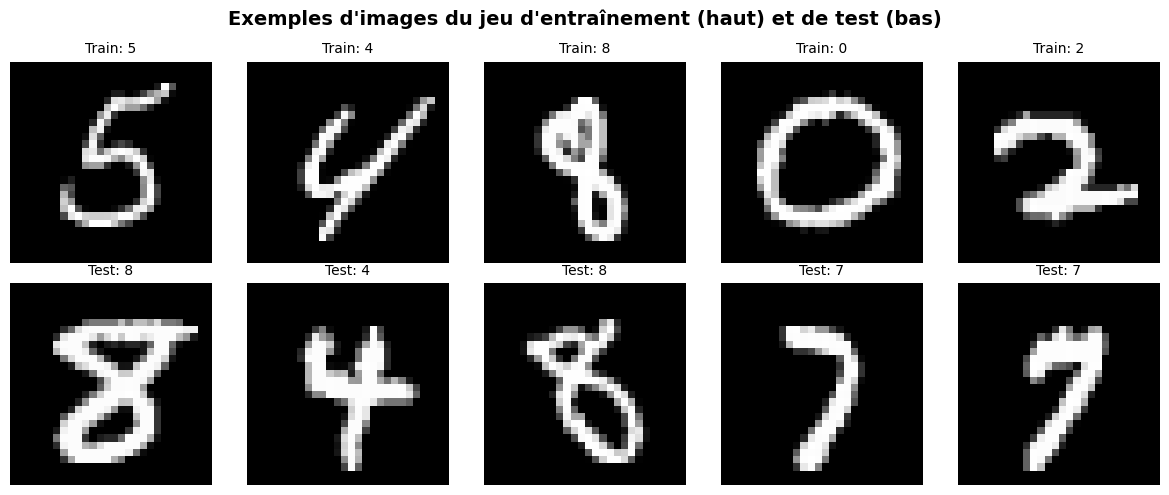

In [40]:
# Affiche 5 images du jeu d'entraînement et 5 du jeu de test

fig, axes = plt.subplots(2, 5, figsize=(12, 5)) # Crée une figure avec 2 lignes et 5 colonnes

# Affichage des images d'entraînement
for i in range(5):
    axes[0, i].imshow(X_train[i].reshape(28, 28), cmap='gray') # Affiche l'image d'entraînement
    axes[0, i].set_title(f"Train: {y_train[i]}", fontsize=10) # Affiche le label
    axes[0, i].axis('off') # Enlève les axes

# Affichage des images de test
for i in range(5):
    axes[1, i].imshow(X_test[i].reshape(28, 28), cmap='gray') # Affiche l'image de test
    axes[1, i].set_title(f"Test: {y_test[i]}", fontsize=10) # Affiche le label
    axes[1, i].axis('off') # Enlève les axes

plt.suptitle("Exemples d'images du jeu d'entraînement (haut) et de test (bas)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Rapport d’exploration du dataset MNIST


### 1. Chargement et compréhension des données. 

- Le dataset MNIST a été chargé avec succès via Scikit-learn.  
- Il contient 70 000 images de chiffres manuscrits (0 à 9), chacune représentée par 784 pixels (28x28).  
- Les labels sont bien répartis entre les 10 classes (chiffres de 0 à 9).  

### 2. Visualisation et analyse. 

- Plusieurs exemples d’images ont été affichés pour vérifier la qualité et la diversité des données.  
- Un graphique en barres a permis de confirmer que la distribution des classes est équilibrée.  

### 3. Prétraitement. 

- Les valeurs des pixels ont été normalisées entre 0 et 1 pour faciliter l’apprentissage du modèle.  
- Les données ont été séparées en deux ensembles : 80 % pour l’entraînement, 20 % pour le test.  

### 4. Vérification visuelle. 

- Des images issues des jeux d’entraînement et de test ont été affichées pour s’assurer que la séparation est correcte et aléatoire.  

## Conclusion

- Les données MNIST ont bien été chargées et comprises.
- Les images sont normalisées (valeurs entre 0 et 1) pour faciliter l’apprentissage.
- La distribution des classes est équilibrée (chaque chiffre apparaît autant de fois).
- Les données ont été séparées en jeux d’entraînement et de test.
- La vérification visuelle confirme que la séparation est correcte.